##1. Import Package and Data

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
#calculating missing values in the dataset
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table


,Total Missing Values,Missing %
Timestamp,0,0.000000
Open,1241716,27.157616
High,1241716,27.157616
Low,1241716,27.157616
Close,1241716,27.157616
Volume_(BTC),1241716,27.157616
Volume_(Currency),1241716,27.157616
Weighted_Price,1241716,27.157616


##2. Statistical Analysis

In [ ]:
df=df.dropna()

print(df.head())
print(df.head())
print(df.columns)
df['Date'] = pd.to_datetime(df.Timestamp, unit='s')
df=df.rename(columns={"Volume_(BTC)": "Volume_BTC", "Volume_(Currency)": "Volume_Currency"})
print(df.tail())
print('Dataset info: ',df.info())
print('Dataset Shape: ',  df.shape)

       Timestamp  Open  High  ...  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0     1325317920  4.39  4.39  ...      0.455581           2.000000        4.390000
478   1325346600  4.39  4.39  ...     48.000000         210.720000        4.390000
547   1325350740  4.50  4.57  ...     37.862297         171.380338        4.526411
548   1325350800  4.58  4.58  ...      9.000000          41.220000        4.580000
1224  1325391360  4.58  4.58  ...      1.502000           6.879160        4.580000

[5 rows x 8 columns]
       Timestamp  Open  High  ...  Volume_(BTC)  Volume_(Currency)  Weighted_Price
0     1325317920  4.39  4.39  ...      0.455581           2.000000        4.390000
478   1325346600  4.39  4.39  ...     48.000000         210.720000        4.390000
547   1325350740  4.50  4.57  ...     37.862297         171.380338        4.526411
548   1325350800  4.58  4.58  ...      9.000000          41.220000        4.580000
1224  1325391360  4.58  4.58  ...      1.502000           6.87916

                 Timestamp      Open      High       Low     Close  \
Timestamp         1.000000  0.807947  0.807782  0.808162  0.807950   
Open              0.807947  1.000000  0.999999  0.999998  0.999998   
High              0.807782  0.999999  1.000000  0.999997  0.999999   
Low               0.808162  0.999998  0.999997  1.000000  0.999999   
Close             0.807950  0.999998  0.999999  0.999999  1.000000   
Volume_BTC       -0.100298 -0.064290 -0.064048 -0.064595 -0.064326   
Volume_Currency   0.191360  0.289368  0.289891  0.288706  0.289291   
Weighted_Price    0.807974  0.999999  0.999999  0.999999  0.999999   

                 Volume_BTC  Volume_Currency  Weighted_Price  
Timestamp         -0.100298         0.191360        0.807974  
Open              -0.064290         0.289368        0.999999  
High              -0.064048         0.289891        0.999999  
Low               -0.064595         0.288706        0.999999  
Close             -0.064326         0.289291        0.

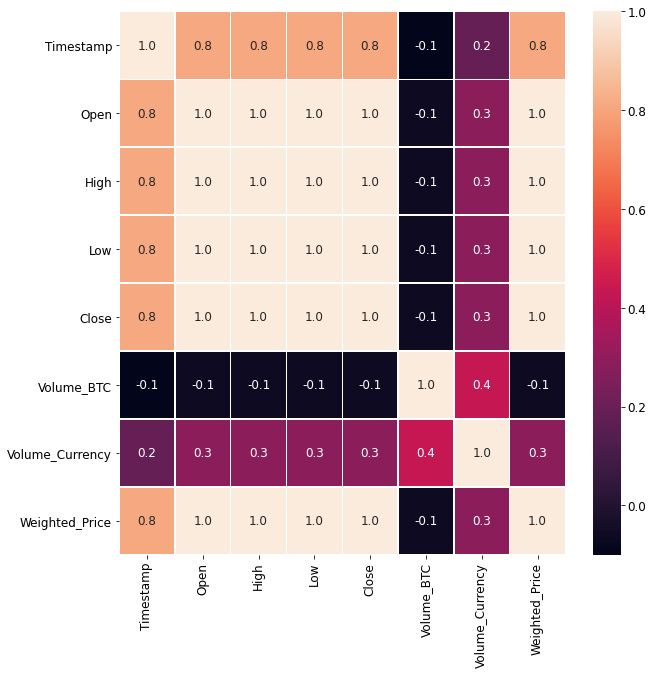

In [ ]:
#correlation map
pd.set_option('display.max_columns',None)
print(df.corr())
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3. Data Visualization

In [ ]:
df.Day = df.Date.apply(lambda x: dt.datetime(x.year,x.month,x.day))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


3.1 Open/High/Low/Close Price Trend Plot

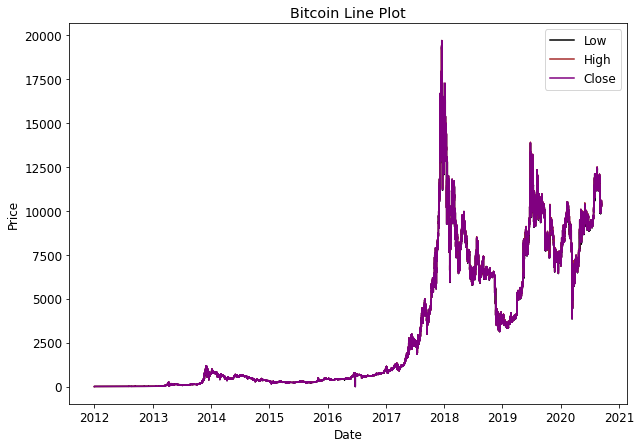

In [ ]:
x=df.Day
y1=df.Low
y2=df.High
y3=df.Close
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x,y1,color = 'black',label = 'Low')
plt.plot(x,y2,color="Brown",label="High")
plt.plot(x,y3,color="purple",label="Close")
plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Price")
#plt.zlabel("Z-Axis")
plt.title("Bitcoin Line Plot")
plt.show()

3.2 Price distribution

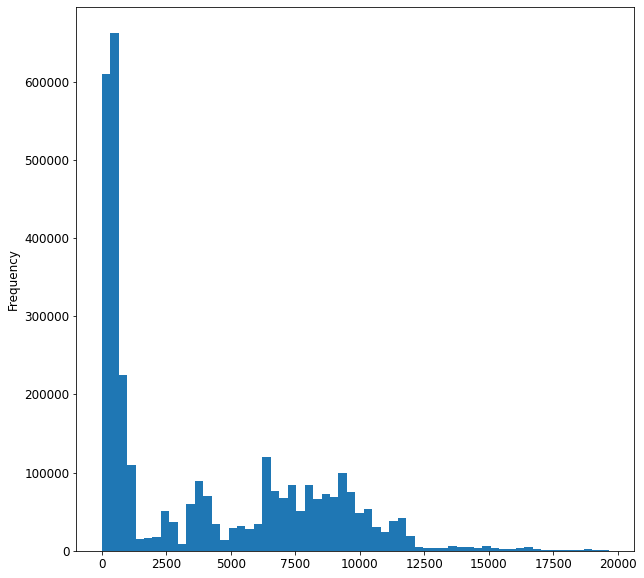

In [ ]:
df.Low.plot(kind="hist",bins=60,figsize=(10,10))
plt.show()

3.3 Price Trend(Weighted Price)

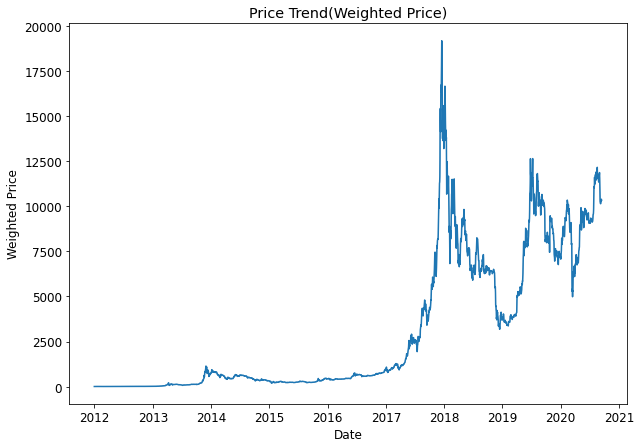

In [ ]:
df_days_avg = df.groupby(df.Day, as_index = False).agg("mean")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(x=df.Day, y=df.Weighted_Price, data=df_days_avg)
ax.set(ylabel="Weighted Price")
ax.set(title="Price Trend(Weighted Price)")
plt.show()

3.4 Volume Trend(By BTC Volume)

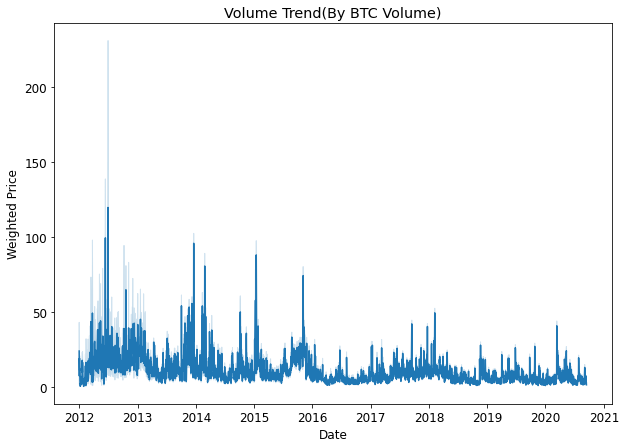

In [ ]:
df_days_sum = df.groupby(df.Day, as_index = False).agg("sum")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(x=df.Day, y=df.Volume_BTC, data=df_days_sum)
ax.set(ylabel="Weighted Price")
ax.set(title="Volume Trend(By BTC Volume)")
plt.show()

3.5 Volume Trend(Volume Currency)

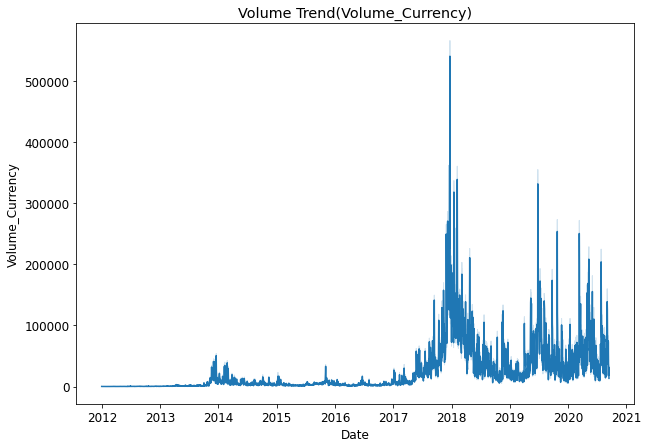

In [ ]:
df_days_sum = df.groupby(df.Day, as_index = False).agg("sum")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.lineplot(x=df.Day, y=df.Volume_Currency, data=df_days_sum)
ax.set(ylabel="Volume_Currency")
ax.set(title="Volume Trend(Volume_Currency)")
plt.show()

3.6 Best Week of Day

Hope to find out in which day during the week that has the lowest price.

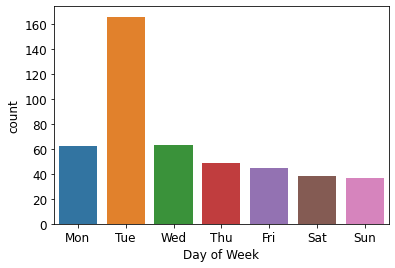

In [ ]:
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Date'].dt.dayofweek.map(dayOfWeek)

# find indices with min value of that week
idx = df.groupby([pd.Grouper(key='Date', freq='W-MON')])['Weighted_Price'].transform(min) == df['Weighted_Price']

# remove duplicate day rows
weekly_lows = df[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
weekly_lows = weekly_lows.dropna()

sns.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

3.7 Best Time of Day to Buy

Hope to find out when would have the lowest price in a day

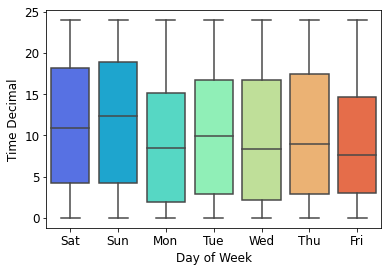

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Date'].dt.dayofweek.map(dayOfWeek)
df['Time Decimal'] = df['Date'].dt.hour + df['Date'].dt.minute/60
daily_lows = df[df.groupby([pd.Grouper(key='Date', freq='D')])['Weighted_Price'].transform(min) == df['Weighted_Price']]
sns.boxplot(x="Day of Week", y="Time Decimal", data=daily_lows, palette='rainbow')

##4. Data Model 1

Data Modeling using one column.-- The Closed Price

4.1 Data processing before modeling

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv') # Use Timestamp as index
df['Date'] = pd.to_datetime(df.Timestamp, unit='s')
df = df.set_index('Date')
df= df.resample("24H").mean()
df.iloc[:,4] = pd.to_numeric(df.iloc[:,4],errors='coerce')
#df.dropna(inplace=True)
#Printing head
df.head()
dataset = pd.DataFrame(df)
print(dataset)
# summary statistics
#print(df.describe())

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
dataset = dataset.interpolate()
df = dataset

print("After interpolation ....")

print(df)
df=df.iloc[:,4]
df.tail()


               Timestamp          Open  ...  Volume_(Currency)  Weighted_Price
Date                                    ...                                   
2011-12-31  1.325347e+09      4.465000  ...         106.330084        4.471603
2012-01-01  1.325419e+09      4.806667  ...          35.259720        4.806667
2012-01-02  1.325506e+09      5.000000  ...          95.240000        5.000000
2012-01-03  1.325592e+09      5.252500  ...          58.100651        5.252500
2012-01-04  1.325678e+09      5.200000  ...          63.119577        5.208159
...                  ...           ...  ...                ...             ...
2020-09-10  1.599739e+09  10338.759708  ...       73621.083972    10339.359896
2020-09-11  1.599826e+09  10302.414327  ...       37706.667029    10303.242947
2020-09-12  1.599912e+09  10372.770434  ...       18200.013902    10373.259995
2020-09-13  1.599998e+09  10393.230099  ...       31635.949638    10393.662602
2020-09-14  1.600042e+09  10338.820000  ...       13

Date
2020-09-10    10338.760864
2020-09-11    10302.451926
2020-09-12    10372.583252
2020-09-13    10392.960134
2020-09-14    10332.370000
Freq: 24H, Name: Close, dtype: float64

Spilt data into train and test set

In [ ]:
n_row = df.shape[0]
train_n_row = int(n_row * 0.8) 
train=df[0:train_n_row] 
test=df[train_n_row:]

df=df.dropna()
train=train.dropna()
test=test.dropna()

plot out train and test data

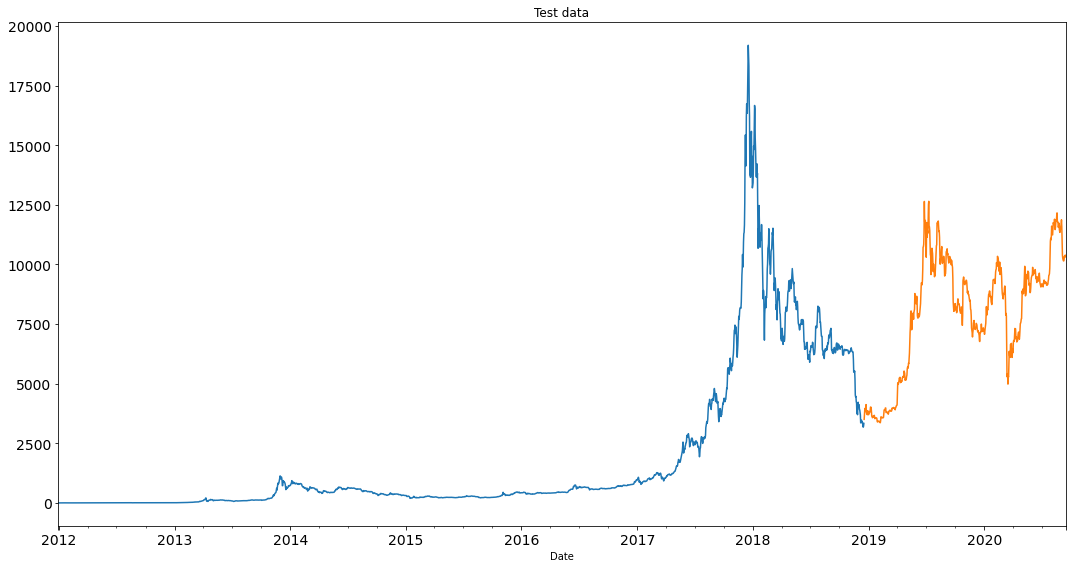

In [ ]:
#Plotting data
train.plot(figsize=(15,8), title= 'Train data', fontsize=14)
test.plot(figsize=(15,8), title= 'Test data', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
train=pd.DataFrame(train)
test=pd.DataFrame(test)

4.2 Navie Forecast

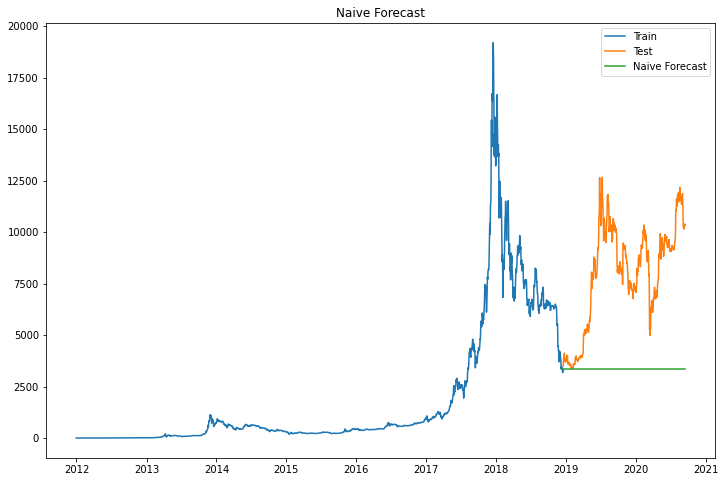

In [ ]:
dd= np.asarray(train.iloc[:,0])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train.iloc[:,0], label='Train')
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.iloc[:,0], y_hat.naive))
print('Naive Forecast',rms)


Naive Forecast 5250.758895539317


4.3 avg_forecast

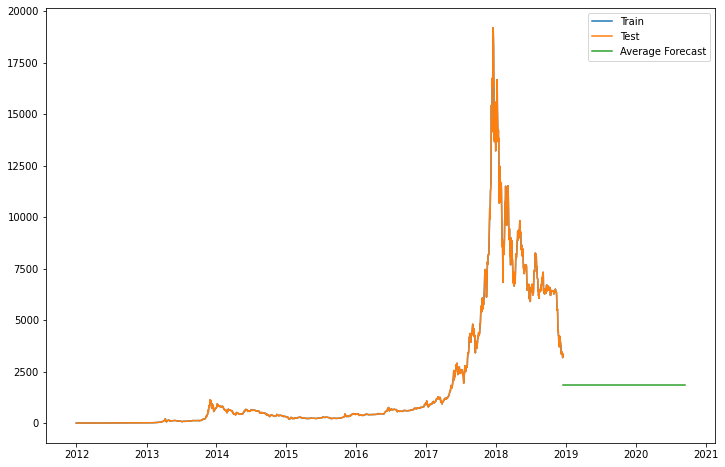

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.iloc[:,0].mean()
plt.figure(figsize=(12,8))
plt.plot(train.iloc[:,0], label='Train')
plt.plot(train.iloc[:,0], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
print(test.iloc[:,0])
print("====")
print("====")
print(y_hat_avg.avg_forecast)
rms = sqrt(mean_squared_error(test, y_hat_avg.avg_forecast))
print('avg_forecast',rms)

Date
2018-12-18     3508.732186
2018-12-19     3748.580293
2018-12-20     3923.647013
2018-12-21     3972.444503
2018-12-22     3851.894035
                  ...     
2020-09-10    10338.760864
2020-09-11    10302.451926
2020-09-12    10372.583252
2020-09-13    10392.960134
2020-09-14    10332.370000
Freq: 24H, Name: Close, Length: 637, dtype: float64
====
====
Date
2018-12-18    1849.017767
2018-12-19    1849.017767
2018-12-20    1849.017767
2018-12-21    1849.017767
2018-12-22    1849.017767
                 ...     
2020-09-10    1849.017767
2020-09-11    1849.017767
2020-09-12    1849.017767
2020-09-13    1849.017767
2020-09-14    1849.017767
Freq: 24H, Name: avg_forecast, Length: 637, dtype: float64
avg_forecast 6602.606377367888


4.4 Moving Average Forecast

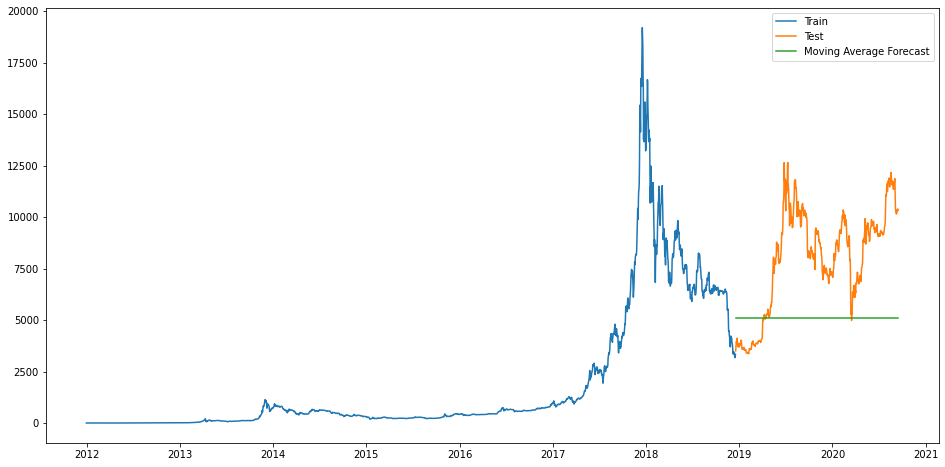

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train.iloc[:,0].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.moving_avg_forecast))
print('moving_avg_forecast',rms)

moving_avg_forecast 3801.1063827709268


4.5 SimpleExpSmoothing 

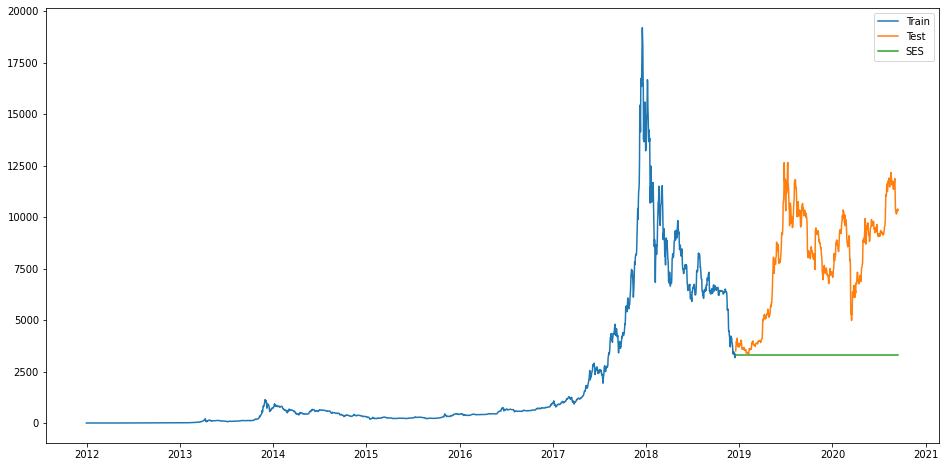

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train.iloc[:,0])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print('SimpleExpSmoothing',rms)

SimpleExpSmoothing 5292.543633969879


4.6 Holt_linear

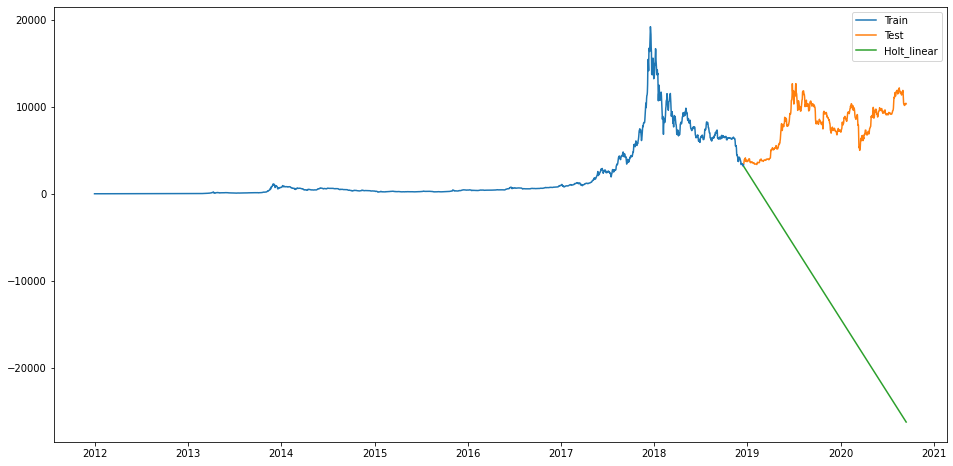

In [ ]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_linear))
print('Holt_linear',rms)

Holt_linear 22043.072684640207


4.7 Holt_Winter

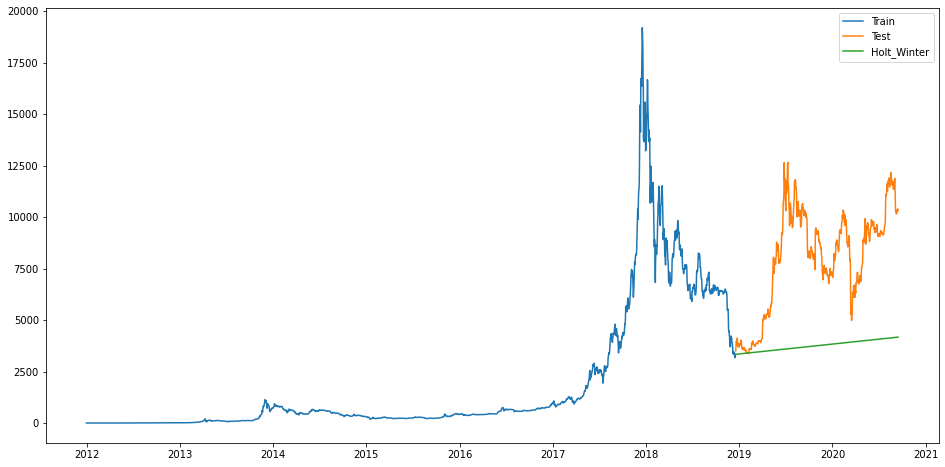

In [ ]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train.iloc[:,0]) ,seasonal_periods=7 ,trend='add', seasonal='Addictive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg['Holt_Winter']))
print('Holt_Winter',rms)

Holt_Winter 4813.018925724726


4.8 SARIMA

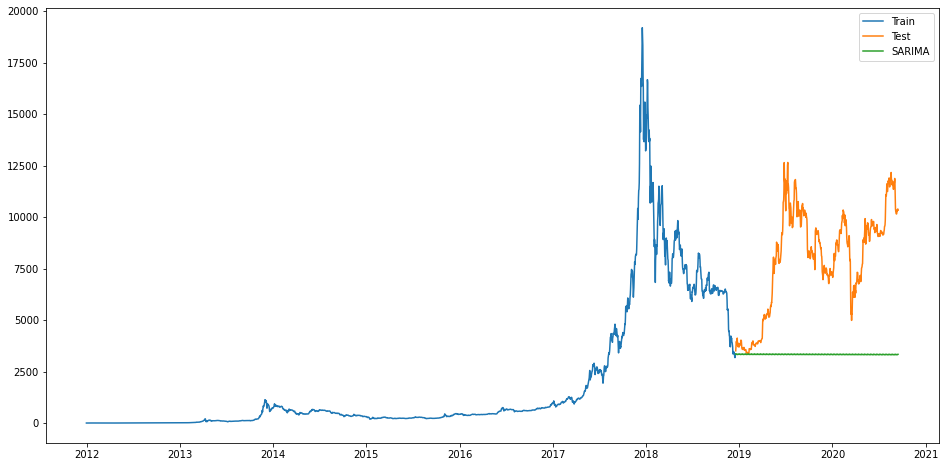

In [ ]:
import statsmodels.api as sm
y_hat_avg = test.copy()
# Seasonal Arima = Sarima
# Order: default (1,0,0). <- AR(1) model 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
fit1 = sm.tsa.statespace.SARIMAX(np.asarray(train.iloc[-5000:,0]), seasonal_order=(1,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SARIMA.dropna()))
print("SARIMA", rms)

SARIMA 5255.8717263193175


##5 Data Modelling 2


using more than one features and use auto-ARIMA

5.1 Data Processing before modelling

In [ ]:
#Resampling data
print(df.isna().sum())
df = df.set_index('Date')
hourly_data = df.resample('1H').mean()
hourly_data = hourly_data.reset_index()
# hourly_data.head()


Timestamp          0
Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
Date               0
dtype: int64


In [ ]:
#daily resampling
df_daily = df.resample("24H").mean() 
df_daily.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
Date,,,,,,,,
2011-12-31,1.325342e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,1.325427e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,1.325535e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,1.325605e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,1.325682e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


5.2 Data checking 

Time Series Decomposition

Timestamp          0
Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  # Remove the CWD from sys.path while we load stuff.


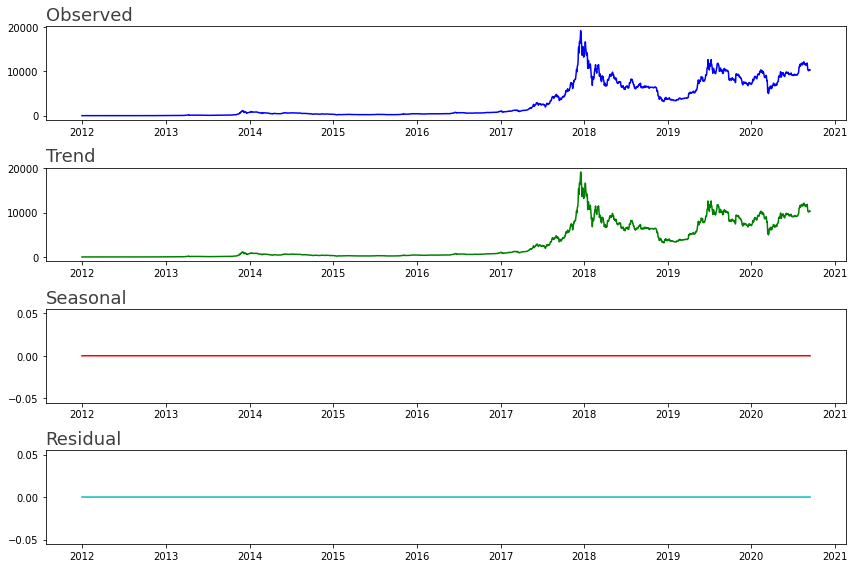

In [ ]:
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_daily.replace(to_replace=r'^\s*$',value=np.nan,regex=True,inplace=True)
df_daily=df_daily.dropna()
print(df.isna().sum())
decomposition = sm.tsa.seasonal.seasonal_decompose(df_daily.Weighted_Price,freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(df_daily.Weighted_Price, label='Original',color='b')
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend',color='g')
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='r')
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residuals',color='c')
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

Post time series decomposition here don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary.


Stastical tests can be performed for checking if the time series is stationary or not. One such test is Dickey-Fuller Test. The DF tests a null hypothesis that a unit root is present in an autoregressive model. If the value is less then <0.05 then the data is stationary


In [ ]:
import statsmodels.api as sm
print("Dicky-Fuller stationarity test: p=%f" % sm.tsa.adfuller(df_daily["Weighted_Price"])[1])

Dicky-Fuller stationarity test: p=0.648376


Rolling windows
A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(), etc. For this dataset, here use a rolling mean for 3, 7 and 30 days.

In [ ]:
df=df_daily
df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_BTC"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


,Date,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_BTC_mean_lag3,Volume_BTC_mean_lag7,Volume_BTC_mean_lag30,Volume_BTC_std_lag3,Volume_BTC_std_lag7,Volume_BTC_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,1.325342e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,3072.634678,3066.150631,3026.461155,70.972297,118.643605,269.401544,3074.732761,3068.246267,3028.537796,70.916790,118.610255,269.536728,3070.399383,3063.917589,3024.246068,71.024373,118.674035,269.246962,3072.601300,3066.117304,3026.428022,70.969553,118.644513,269.407306,10.643761,10.651293,10.664182,3.737566,4.529469,5.592678
2012-01-01,2012-01-01,1.325427e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,4.465000,4.465000,4.465000,70.972297,118.643605,269.401544,4.482500,4.482500,4.482500,70.916790,118.610255,269.536728,4.465000,4.465000,4.465000,71.024373,118.674035,269.246962,4.482500,4.482500,4.482500,70.969553,118.644513,269.407306,23.829470,23.829470,23.829470,3.737566,4.529469,5.592678
2012-01-02,2012-01-02,1.325535e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,4.635833,4.635833,4.635833,0.241595,0.241595,0.241595,4.644583,4.644583,4.644583,0.229220,0.229220,0.229220,4.635833,4.635833,4.635833,0.241595,0.241595,0.241595,4.644583,4.644583,4.644583,0.229220,0.229220,0.229220,15.515068,15.515068,15.515068,11.758339,11.758339,11.758339
2012-01-03,2012-01-03,1.325605e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,4.757222,4.757222,4.757222,0.270906,0.270906,0.270906,4.763056,4.763056,4.763056,0.261492,0.261492,0.261492,4.757222,4.757222,4.757222,0.270906,0.270906,0.270906,4.763056,4.763056,4.763056,0.261492,0.261492,0.261492,16.692712,16.692712,16.692712,8.560947,8.560947,8.560947
2012-01-04,2012-01-04,1.325682e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,5.019722,4.881042,4.881042,0.223570,0.332042,0.332042,5.019722,4.885417,4.885417,0.223570,0.324768,0.324768,5.019722,4.881042,4.881042,0.223570,0.332042,0.332042,5.019722,4.885417,4.885417,0.223570,0.324768,0.324768,12.417776,15.270699,15.270699,6.048760,7.546413,7.546413


In [ ]:
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Date,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,Open_std_lag3,Open_std_lag7,Open_std_lag30,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,Low_std_lag7,Low_std_lag30,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_BTC_mean_lag3,Volume_BTC_mean_lag7,Volume_BTC_mean_lag30,Volume_BTC_std_lag3,Volume_BTC_std_lag7,Volume_BTC_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31,2011-12-31,1.325342e+09,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,3072.634678,3066.150631,3026.461155,70.972297,118.643605,269.401544,3074.732761,3068.246267,3028.537796,70.916790,118.610255,269.536728,3070.399383,3063.917589,3024.246068,71.024373,118.674035,269.246962,3072.601300,3066.117304,3026.428022,70.969553,118.644513,269.407306,10.643761,10.651293,10.664182,3.737566,4.529469,5.592678,12,52,31,5
2012-01-01,2012-01-01,1.325427e+09,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667,4.465000,4.465000,4.465000,70.972297,118.643605,269.401544,4.482500,4.482500,4.482500,70.916790,118.610255,269.536728,4.465000,4.465000,4.465000,71.024373,118.674035,269.246962,4.482500,4.482500,4.482500,70.969553,118.644513,269.407306,23.829470,23.829470,23.829470,3.737566,4.529469,5.592678,1,52,1,6
2012-01-02,2012-01-02,1.325535e+09,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000,4.635833,4.635833,4.635833,0.241595,0.241595,0.241595,4.644583,4.644583,4.644583,0.229220,0.229220,0.229220,4.635833,4.635833,4.635833,0.241595,0.241595,0.241595,4.644583,4.644583,4.644583,0.229220,0.229220,0.229220,15.515068,15.515068,15.515068,11.758339,11.758339,11.758339,1,1,2,0
2012-01-03,2012-01-03,1.325605e+09,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500,4.757222,4.757222,4.757222,0.270906,0.270906,0.270906,4.763056,4.763056,4.763056,0.261492,0.261492,0.261492,4.757222,4.757222,4.757222,0.270906,0.270906,0.270906,4.763056,4.763056,4.763056,0.261492,0.261492,0.261492,16.692712,16.692712,16.692712,8.560947,8.560947,8.560947,1,1,3,1
2012-01-04,2012-01-04,1.325682e+09,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159,5.019722,4.881042,4.881042,0.223570,0.332042,0.332042,5.019722,4.885417,4.885417,0.223570,0.324768,0.324768,5.019722,4.881042,4.881042,0.223570,0.332042,0.332042,5.019722,4.885417,4.885417,0.223570,0.324768,0.324768,12.417776,15.270699,15.270699,6.048760,7.546413,7.546413,1,1,4,2


In [ ]:
df.shape

(3178, 43)

5.3 Train and test set spilt

In [ ]:
df_train = df[df.Date < "2020"]
df_valid = df[df.Date >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2920, 43)
validation shape : (258, 43)


5.4 AUTO-ARIMA Model


ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

In [ ]:
!pip install pmdarima
import pmdarima as pm

In [ ]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_BTC_mean_lag3', 'Volume_BTC_mean_lag7',
       'Volume_BTC_mean_lag30', 'Volume_BTC_std_lag3',
       'Volume_BTC_std_lag7', 'Volume_BTC_std_lag30', 'month', 'week',
       'day', 'day_of_week']

In [ ]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True,
                      error_action="ignore", suppress_warnings=True)
model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=38853.331, Time=27.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=40040.566, Time=8.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=39050.658, Time=24.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39212.305, Time=16.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40062.759, Time=31.90 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=38827.535, Time=26.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=38862.610, Time=26.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=39003.982, Time=24.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=38829.551, Time=30.72 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=38829.912, Time=29.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=38987.095, Time=26.43 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=38823.258, Time=33.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=38821.292, Time=32.73 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=38873.199, Time=31.02 sec
 ARIMA

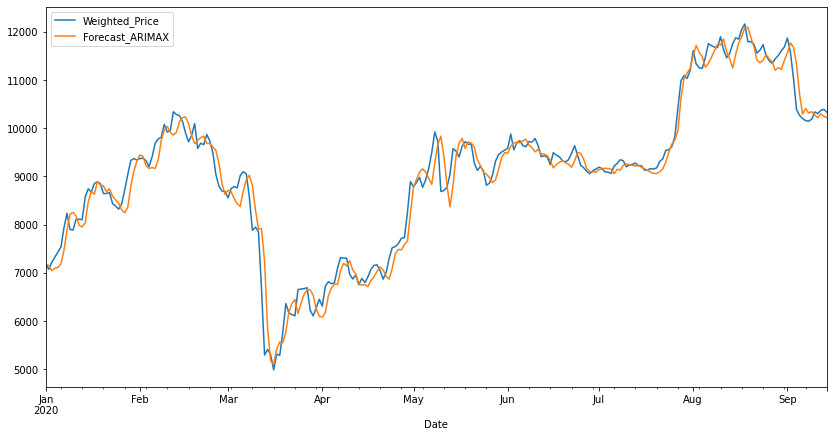

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 313.76773833459725

MAE of Auto ARIMAX: 218.16534262063487


##6. Model Comparison



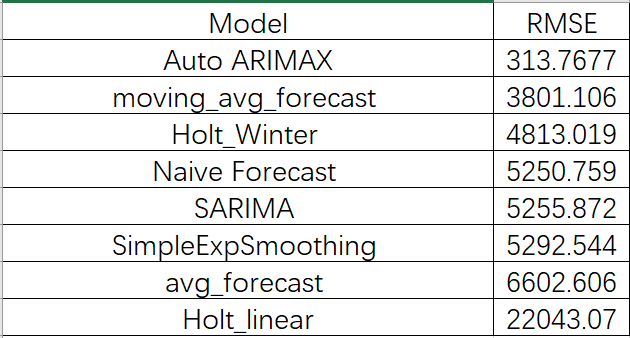
